# Fundamentals of Data Analysis


# TASKS 2020

#### Lecturer: Ian McLoughlin


#### Damien Connolly
#### G00340321

In [1]:
# Run this cell first

# Imports libraries used in notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
from collections import defaultdict

## Task 1 - Counts

#### Task
Write a Python function that takes a list as input and returns a 
dictionary of unique items in the list as keys and the number of 
times each item appears as values.


#### Solution
I decided to iterate over the list and use each distinct element of the list as a key of the dictionary and store the corresponding count of that key as values. 
************************************************************************************************************************
<br/>

In [2]:
# Code adapted from references [1, 2]

# Create list
list = ['A', 'A', 'B', 'A', 'C']

# Create function
def counts():
    
    # Create an empty dictionary
    dict = {}
    # Loop through list and store item in dictionary
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    # Print each key and value from the dict
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'A': 3, 'B': 1, 'C': 1}

In [3]:
# Test code on different list

list = ['C', 'C', 'B', 'A', 'D']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'C': 2, 'B': 1, 'A': 1, 'D': 1}

In [4]:
# Test code on different list

list = ['Gorilla', 'Robin', 'Bat', 'Robin', 'Robin', 'Tiger', 'Cat', 'Cat']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'Gorilla': 1, 'Robin': 3, 'Bat': 1, 'Tiger': 1, 'Cat': 2}

<br/>

#### References:

[1]. https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

[2]. https://docs.python.org/3/tutorial/controlflow.html

********************************************************************************************************************************

<br/>

## Task 2 - Dicerolls

#### Task

Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}


#### Solution

Solution 1 - For this function I created a list to store the dice variables and a dictionary to store the results. Then numpy.random.randint was used to simulate the values for the dice roll. By setting numpy.random.randint to (2, 7) in order to get the same output as would be on a dice the simulation would not return a combined 7, due to the other parameters within the function. In order to correct this np.random.randint was set to (1, 7) so an output of every number from 1 to 12 would be possible. The number 1 was then removed from the final dictionary using del dict[1]. 

Solution 2 - For this function a default dict was used so it would not throw a key error. The dice values were set and np.random.randint was used to simulate the values. 
********************************************************************************************************************************
<br/>

In [5]:
# Solution 1
# Adapted from references [1, 2, 3, 4]

def dicerolls(k,n):
    
    # Set variables
    roll = n
    noroll = 0
    dicevalue = k * 6
    
    # Use list to store dice
    dice = []
    for i in range(k):
        dice.append(i+1)
    
    # Dictionary to store result
    dict = {}
   
    while dicevalue > 0:
        dict[dicevalue] = 0
        dicevalue -= 1
        
    # Roll the dice    
    while roll > 0:
        diceroll = np.random.randint(1,7)
        for i in dice:
            result = (diceroll + noroll)
            dicevalue = dict.get(diceroll)
            dict[result] = dicevalue + 1
            noroll += 6
        roll -= 1
        noroll = 0
        
    # Remove 1 from dict output    
    del dict[1]
    
    print(dict)
        
dicerolls(2,1000)

{12: 175, 11: 189, 10: 171, 9: 148, 8: 161, 7: 162, 6: 174, 5: 188, 4: 170, 3: 147, 2: 160}


In [6]:
# Solution 2 
# Adapted from stackoverflow[5]

# Set variables
# Number of dice rolls
n = 1000

# Number of dice 
k = 2

# Create a defaultdict to store the results

# Defaultdict is a sub-class of the dict class that returns a dictionary-like object. 
# The functionality of both dictionaries and defualtdict are almost same except for the
# fact that defualtdict never raises a KeyError[5]

dicerolls = defaultdict(int)

# Loop through n times
for _ in range(n):
    # Simulate random values for the dice rolled
    k = np.random.randint(2, 13)
        # Increase the result by 1
    dicerolls[k]+=1

# Print results
print(dicerolls)

defaultdict(<class 'int'>, {5: 100, 2: 108, 10: 84, 3: 83, 9: 86, 6: 84, 4: 91, 12: 92, 11: 90, 8: 89, 7: 93})



#### References:

[1]. codegrepper.com https://www.codegrepper.com/code-examples/python/dice+rolling+function+python

[2]. careerkarma.com https://careerkarma.com/blog/python-dictionary-get/

[3]. stackoverflow.com https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

[4]. stackoverflo.com https://stackoverflow.com/questions/5844672/delete-an-element-from-a-

[5]. stackoverflow.com https://stackoverflow.com/questions/60343980/rolling-2-dice-1000-times-and-counting-the-number-of-times-the-sum-of-the-two-di
*****************************************************************************************************************************

<br/>
<br/>

## Task 3 - numpy.random.binomial


#### Task
The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.


#### Solution
Binomial distribution is a distribution where only two outcomes are possible, such as success or failure, gain or loss or win or lose and the probability of success and failure is the same for all its trials <sup>1</sup>. Taking the example of a coin toss, there are only two possible outcomes, heads or tails. The probability of getting a heads (success) can be seen as p = 0.5 and the probability of getting a tails (failure) can be seen as q = 1 - p = 0.5. This function can also be used if outcomes are not equal, eg. if the probability of success is p = 0.2 then the probability of failure is q = 1 - 0.2 = 0.8. Each trial is independent since the outcome of the previous toss doesn’t determine or affect the outcome of the current toss<sup>1</sup>. The total number of trials can be set using n = 20 and by setting size = 1000 we can run the 20 trials 1000 times and view the outcome <sup>2</sup>.
******************************************************************************************************************************
<br/>

Text(0.5, 0, 'Binomial distribution')

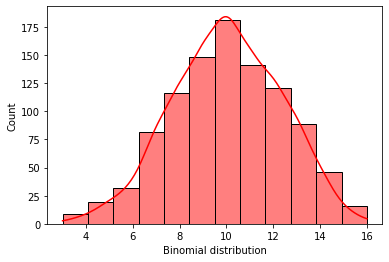

In [7]:
# Coin toss example which displays binomial distribution[2]. 

# Number of trials
size = 1000
# Number of independent coin tosses in each trial
n = 20
# Probability of success for each experiment
p = 0.5

# Run the trials
bd = np.random.binomial(n, p, size)

# Plot the result to show distribution
ax = sns.histplot(bd, kde=True, color='red', bins=12)
ax.set_xlabel ('Binomial distribution')

Text(0.5, 0, 'Binomial distribution')

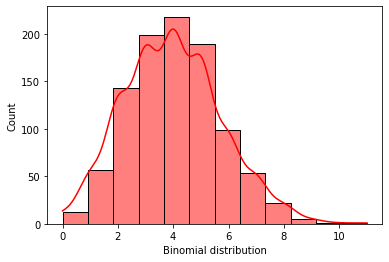

In [8]:
# Example which displays binomial distribution with unequal probability[2]

# Run trials
bd = np.random.binomial(20, 0.2, 1000)

# Plot distribution
ax = sns.histplot(bd, kde=True, color='red', bins=12)
ax.set_xlabel ('Binomial distribution')

#### References:

[1]. analyticsvidhya.com https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

[2]. towardsdatascience.com https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b
*********************************************************************************************************************

<br/>
<br/>

## Task 4 - Simpson's Paradox

#### Task
Simpson’s paradox is a well-known statistical paradox
where a trend evident in a number of groups reverses when the groups are combined
into one big data set. Use numpy to create four data sets, each with an x array
and a corresponding y array, to demonstrate Simpson’s paradox. You might
create your x arrays using numpy.linspace and create the y array for each
x using notation like y = a * x + b where you choose the a and b for each
x , y pair to demonstrate the paradox. You might see the Wikipedia page for
Simpson’s paradox for inspiration.

#### Solution
Simpson's paradox is a phenomenon in probability and statistics in which trends that appears in different groups of data disappear or reverse when these groups are combined. Simpson’s paradox happens because disaggregation of the data can cause certain subgroups to have an imbalanced representation compared to other subgroups. This might be due to the relationship between the variables, or simply due to the way that the data has been seperated into subgroups <sup>1</sup>. This result is particularly problematic when frequency data is given casual interpretations and has been used to illustrate the kind of misleading results misapplied statistics can generate. The paradox can be resolved when causal relations are appropriately addressed in the statistical modeling. It is also referred to as Simpson's reversal, Yule–Simpson effect, amalgamation paradox, or reversal paradox <sup>2</sup>.

Below is a fictional example showing Simpson's Paradox in the context of a correlation reversal. We have created data on the number of hours of exercise per week versus the risk of developing a disease for two sets of patients, those below the age of 50 and those over the age of 50. Here are individual plots showing the relationship between exercise and probability of disease <sup>3</sup>.
******************************************************************************************************************************
<br/>

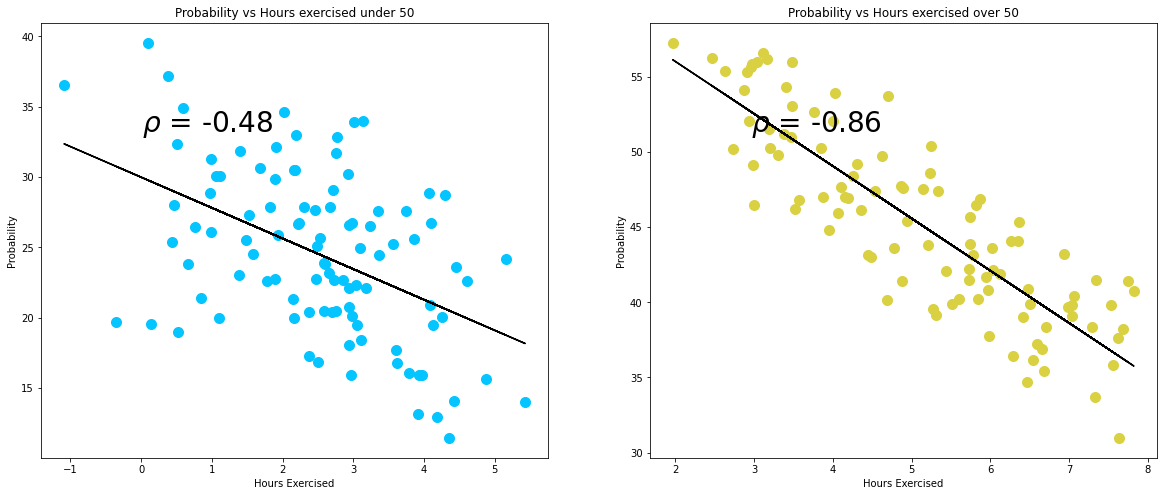

In [9]:
# Example adapted from https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9 [3].

# Create data samples for under_50
n_samples = 100
# Set the seed so the results stay the same
np.random.seed(42)
# Simulate age values 
ages = np.random.randint(20, 50, n_samples)
# Simulate hours values
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
# Calculate probability
p = 12 + 0.5 * ages + -2.1 * hours + np.random.randn(n_samples) *  2
# Create dataframe
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

# Create data samples for over_50
n_samples = 100
# Simulate age values
ages = np.random.randint(50, 85, n_samples)
# Simulate hours values
hours = np.random.randint(3, 8, n_samples) + np.random.randn(n_samples) * 0.5
# 
p = 40 + 0.32 * ages + -3.2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})


# Function used to create plots and show relationships
def plot_relationship(data, c, color, ax):
    #Plot a scatter plot with linear fit#
    x, y = np.array(data[c]), np.array(data['probability'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = c, y = 'probability', c = color, 
              style = 'o', legend = None, ax = ax, ms = 10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color = 'k');
    if color == '#d9d142':
        plt.title(f'Probability vs {c.capitalize()} over 50')
    elif color == '#04c5ff':
        plt.title(f'Probability vs {c.capitalize()} under 50')
    else:
        plt.title(f'Probability vs {c.capitalize()} Combined')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('Probability'); 
    plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

    
plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 2, 1)
plot_relationship(under_50, 'Hours Exercised', '#04c5ff', ax)
ax = plt.subplot(1, 2, 2)
plot_relationship(over_50, 'Hours Exercised', '#d9d142', ax)

<br/>
The plots clearly show a negative correlation, indicating that increased levels of exercise per week are connected with a lower risk of developing a disease for both groups. However, when combined on a single plot the correlation has completely reversed <sup>3</sup>. 

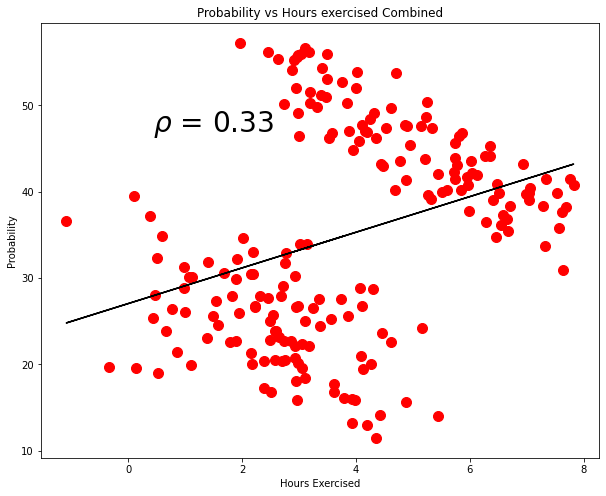

In [10]:
# Create combined plot
plt.figure(figsize = (10, 8))
combined = pd.concat([under_50, over_50], axis = 0)
ax = plt.subplot(1, 1, 1)
plot_relationship(combined, 'Hours Exercised', 'r', ax)

#### References:

[1]. kdnuggets.com https://www.kdnuggets.com/2020/09/simpsons-paradox.html

[2]. wikipedia.org -
https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.

[3]. towardsdatascience.com https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9